# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rifky Maulana Pasaribu
- Email: rifkymp0@gmail.com
- Id Dicoding:

#Import Library

Cell ini bertanggung jawab untuk mengimpor semua pustaka (libraries) Python yang akan digunakan di sepanjang notebook ini. Pustaka-pustaka ini menyediakan fungsionalitas esensial untuk berbagai tahapan dalam proyek, mulai dari manipulasi data, pemrosesan teks, hingga pembangunan model dan visualisasi

In [48]:
import gdown
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import pandas as pd
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import time
from sklearn.neighbors import NearestNeighbors


# Load Dataset

Cell ini bertanggung jawab untuk mengunduh dataset yang diperlukan untuk analisis dari Google Drive. Dataset ini diidentifikasi menggunakan ID uniknya, dan kemudian diunduh ke lingkungan runtime Google Colab atau lingkungan lokal sebagai file CSV dengan nama Dataset.csv.

In [49]:
# Ganti dengan ID asli dari file kamu
dataset = '1zvE4-Y_CYMYANs1mqS6A1qawySsYODZd'

url_dataset = f'https://drive.google.com/uc?id={dataset}'

gdown.download(url_dataset, 'Dataset.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zvE4-Y_CYMYANs1mqS6A1qawySsYODZd
To: /content/Dataset.csv
100%|██████████| 502k/502k [00:00<00:00, 23.5MB/s]


'Dataset.csv'

# Data Understanding dan EDA

Cell ini adalah titik masuk ke dalam fase Data Understanding dan Exploratory Data Analysis (EDA). Tujuan utamanya adalah untuk memuat dataset yang telah diunduh (Dataset.csv) ke dalam struktur data yang dapat dioperasikan (Pandas DataFrame) dan selanjutnya melakukan inspeksi awal untuk memahami karakteristik dasar, struktur, dan potensi masalah pada data sebelum tahapan pra-pemrosesan lebih lanjut

In [50]:
# menampilkan 5 data teratass
dataset= pd.read_csv('Dataset.csv')
dataset.head()

,movie_id,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,100001,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,100002,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,100003,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,100004,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,100005,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


### Nenampilkan info data

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      1272 non-null   int64  
 1   title         1272 non-null   object 
 2   year          1272 non-null   int64  
 3   description   840 non-null    object 
 4   genre         1236 non-null   object 
 5   rating        376 non-null    object 
 6   users_rating  1272 non-null   float64
 7   votes         1272 non-null   object 
 8   languages     1272 non-null   object 
 9   directors     1265 non-null   object 
 10  actors        1272 non-null   object 
 11  runtime       869 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 119.4+ KB


In [52]:
dataset.describe(include='all')

,movie_id,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
count,1272.00000,1272,1272.000000,840,1236,376,1272.000000,1272,1272,1265,1272,869
unique,NaN,1262,NaN,840,15,11,NaN,312,8,377,1266,85
top,NaN,Arini,NaN,It tells the story of an Indonesian revolution...,Drama,13+,NaN,6,Indonesian,Nayato Fio Nuala,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",90 min
freq,NaN,2,NaN,1,456,161,NaN,58,1241,61,4,109
mean,100636.50000,NaN,2007.023585,NaN,NaN,NaN,6.144418,NaN,NaN,NaN,NaN,NaN
std,367.33908,NaN,12.968560,NaN,NaN,NaN,1.389315,NaN,NaN,NaN,NaN,NaN
min,100001.00000,NaN,1926.000000,NaN,NaN,NaN,1.200000,NaN,NaN,NaN,NaN,NaN
25%,100318.75000,NaN,2006.000000,NaN,NaN,NaN,5.300000,NaN,NaN,NaN,NaN,NaN
50%,100636.50000,NaN,2011.000000,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,NaN,NaN
75%,100954.25000,NaN,2016.000000,NaN,NaN,NaN,7.100000,NaN,NaN,NaN,NaN,NaN


 Berdasarkan grafik "10 Genre Terbanyak", dapat disimpulkan bahwa genre Drama merupakan genre yang paling sering muncul dengan jumlah yang sangat dominan dibandingkan genre lainnya. Di posisi berikutnya terdapat genre Comedy dan Horror, meskipun jumlahnya masih cukup jauh di bawah Drama. Sementara itu, genre seperti Adventure, Biography, Thriller, Romance, Fantasy, dan Crime memiliki frekuensi kemunculan yang jauh lebih rendah. Hal ini menunjukkan bahwa distribusi genre dalam dataset cenderung tidak merata, dengan hanya beberapa genre yang mendominasi dan sisanya memiliki representasi yang sangat kecil.



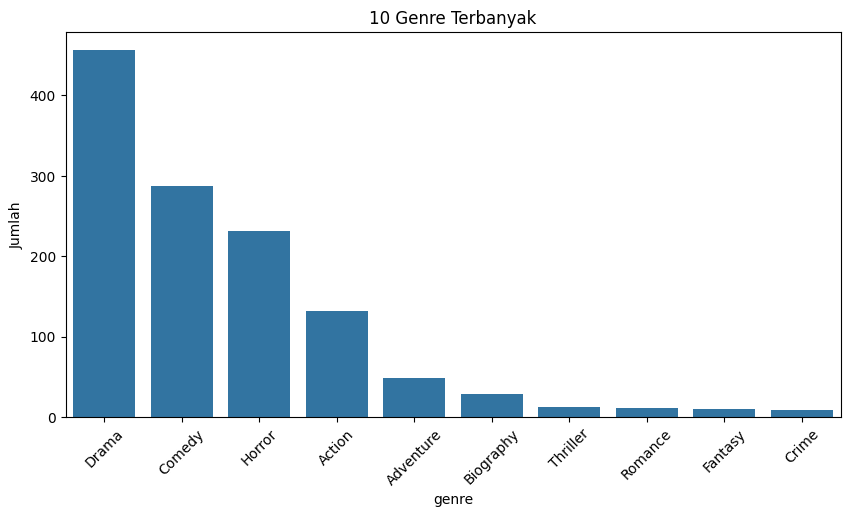

In [53]:
# Genre paling sering muncul
plt.figure(figsize=(10, 5))
top_genres = dataset['genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("10 Genre Terbanyak")
plt.xticks(rotation=45)
plt.ylabel("Jumlah")
plt.show()


Berdasarkan grafik "Jumlah Film per Tahun", dapat disimpulkan bahwa produksi film mengalami peningkatan yang signifikan sejak awal tahun 2000-an, dengan puncaknya terjadi sekitar tahun 2019. Sebelumnya, jumlah film yang diproduksi per tahun cenderung rendah dan relatif stabil. Lonjakan tajam ini mencerminkan berkembangnya industri film modern, kemajuan teknologi, serta meningkatnya permintaan dan akses terhadap hiburan visual. Namun, terjadi penurunan drastis pada tahun 2020, yang kemungkinan besar disebabkan oleh dampak pandemi COVID-19 terhadap industri perfilman global.

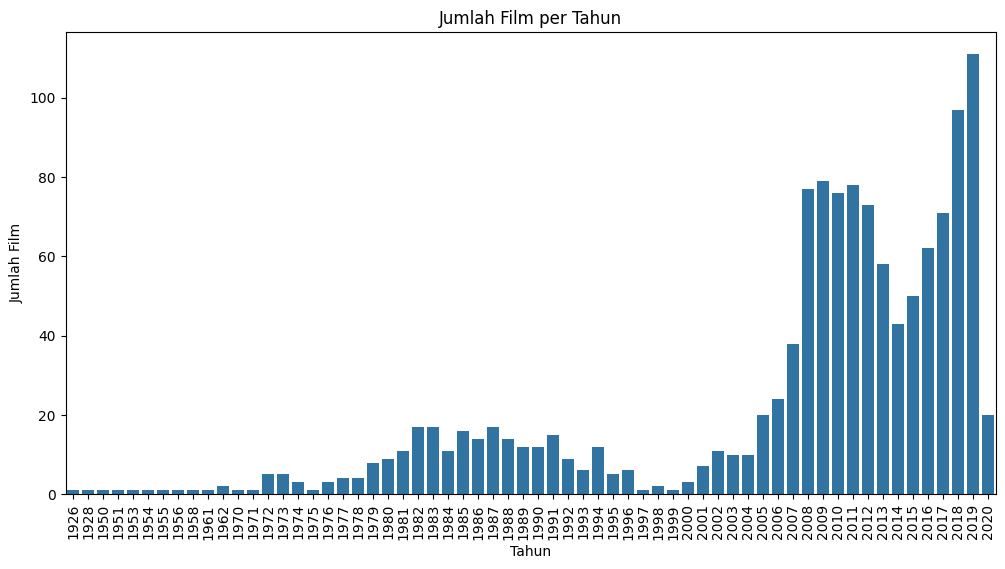

In [54]:
# Menalmpilkan jumplah film pertahun
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=dataset, order=dataset['year'].value_counts().index.sort_values())
plt.xticks(rotation=90)
plt.title('Jumlah Film per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.show()


#Data Preparation

Cell ini adalah bagian awal dari tahapan Data Preparation, berfokus pada penanganan nilai-nilai yang hilang (NaN) pada kolom teks kunci dan rekayasa fitur dengan menggabungkan beberapa kolom teks menjadi satu fitur gabungan. Langkah-langkah ini penting untuk memastikan data siap untuk pemrosesan teks lebih lanjut (misalnya, vectorization) dan model tidak mengalami error karena nilai kosong atau format data yang terpisah.

 Langkah pertama adalah mengganti nilai NaN pada kolom description dan genre dengan string kosong untuk menghindari error saat pemrosesan. Kemudian, kedua kolom tersebut digabung menjadi satu fitur teks baru bernama combined_features. Fitur gabungan ini selanjutnya diubah menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency), yang hanya mempertahankan 1000 fitur paling informatif dan menghilangkan kata-kata umum dalam bahasa Inggris. Setelah itu, dihitung jarak kemiripan antar film menggunakan cosine similarity, yang menghasilkan matriks kemiripan antar semua film. Akhirnya, dilakukan pemetaan indeks terhadap judul film agar sistem dapat dengan mudah mengambil data film berdasarkan judul sebagai referensi untuk rekomendasi.

In [55]:
# Ganti NaN dengan string kosong
dataset['description'] = dataset['description'].fillna('')
dataset['genre'] = dataset['genre'].fillna('')

# Gabungkan konten untuk fitur text
dataset['combined_features'] = dataset['description'] + ' ' + dataset['genre']

# Buat TF-IDF matrix di Data Preparation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf.fit_transform(dataset['combined_features'])

# Hitung cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat mapping indices untuk judul film
indices = pd.Series(dataset.index, index=dataset['title']).drop_duplicates()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1272 non-null   int64  
 1   title              1272 non-null   object 
 2   year               1272 non-null   int64  
 3   description        1272 non-null   object 
 4   genre              1272 non-null   object 
 5   rating             376 non-null    object 
 6   users_rating       1272 non-null   float64
 7   votes              1272 non-null   object 
 8   languages          1272 non-null   object 
 9   directors          1265 non-null   object 
 10  actors             1272 non-null   object 
 11  runtime            869 non-null    object 
 12  combined_features  1272 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 129.3+ KB


# Build Model dan Algoritma

Cell ini mendefinisikan dan mengimplementasikan kelas MovieRecommender yang merupakan inti dari sistem rekomendasi berbasis konten. Kelas ini menggunakan fitur teks gabungan (combined_features) untuk membangun representasi TF-IDF dari film dan kemudian menghitung kesamaan kosinus antar film. Selanjutnya, kelas ini menyediakan metode untuk menghasilkan rekomendasi berdasarkan judul film yang diberikan. Di bagian bawah cell, kelas ini diinisialisasi, dan dilatih.

Kode ini membangun sebuah kelas bernama MovieRecommender yang berfungsi untuk merekomendasikan film berdasarkan kemiripan konten. Konstruktor __init__ menginisialisasi atribut seperti cosine_sim, df, dan indices sebagai None. Fungsi fit() digunakan untuk melatih model dengan data yang telah diproses sebelumnya, termasuk matriks TF-IDF dan matriks kemiripan cosine yang sudah dibuat. Metode get_recommendations() menerima judul film dan jumlah rekomendasi yang diinginkan. Pertama, ia mencari indeks dari film yang diberikan, lalu menghitung skor kemiripan dengan semua film lain, mengurutkannya berdasarkan skor tertinggi, dan mengambil film-film dengan skor tertinggi (kecuali film itu sendiri). Terakhir, ia mengembalikan judul, genre, dan rating pengguna dari film yang direkomendasikan. Jika judul tidak ditemukan, maka akan mengembalikan pesan error.

## Content Based filtering

In [56]:
class MovieRecommender:
    def __init__(self):
        """
        Initialize recommender
        """
        self.cosine_sim = None
        self.indices = None
        self.df = None

    def fit(self, df):
        """
        Fit model dengan dataset yang sudah dipreprocess
        """
        self.df = df
        # Menggunakan TF-IDF matrix dan cosine similarity yang sudah dibuat di Data Preparation
        self.cosine_sim = cosine_sim
        self.indices = indices

    def get_recommendations(self, title, n_recommendations=10):
        """
        Dapatkan rekomendasi berdasarkan judul film
        """
        try:
            # Dapatkan index dari judul film
            idx = self.indices[title]

            # Dapatkan similarity scores
            sim_scores = list(enumerate(self.cosine_sim[idx]))

            # Sort berdasarkan similarity score
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Ambil top n recommendations (skip index 0 karena itu film itu sendiri)
            sim_scores = sim_scores[1:n_recommendations+1]

            # Dapatkan movie indices
            movie_indices = [i[0] for i in sim_scores]

            # Return judul, genre, dan rating film yang direkomendasikan
            return self.df.iloc[movie_indices][['title', 'genre', 'users_rating']]

        except KeyError:
            return f"Film '{title}' tidak ditemukan dalam dataset"

Di akhir, kelas diinstansiasi, data dilatih, dan sistem diuji dengan mengambil film pertama sebagai contoh dan menampilkan hasil rekomendasinya.

In [57]:
# Inisialisasi recommender
recommender = MovieRecommender()
recommender.fit(dataset)
print("✅ Model berhasil dilatih!")

# ========================================
# Test Recommendation

# Ambil film pertama sebagai contoh
sample_movie = dataset['title'].iloc[0]
print(f"Film: {sample_movie}")
print("\nRekomendasi:")
recommendations = recommender.get_recommendations(sample_movie, 5)
print(recommendations)

✅ Model berhasil dilatih!
Film: #FriendButMarried 2

Rekomendasi:
                  title      genre  users_rating
131   #FriendButMarried  Biography           6.9
1118         Johny Indo  Biography           7.6
224   Udah Putusin Aja!      Drama           7.3
962            Brownies                      6.0
414          3600 Detik      Drama           6.6


# Evaluation Model

Cell ini mendefinisikan fungsi evaluate_model(df) yang bertujuan untuk mengevaluasi kinerja sistem rekomendasi dari perspektif "prediksi rating". Meskipun sistem rekomendasi berbasis konten biasanya tidak secara eksplisit "memprediksi" rating, pendekatan ini mencoba mengukur seberapa baik rekomendasi yang diberikan memiliki rating pengguna yang tinggi, mengindikasikan kualitas rekomendasi. Fungsi ini mengambil sampel film secara acak, mendapatkan rekomendasi untuk setiap film tersebut, dan kemudian menghitung Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE) antara rata-rata rating dari rekomendasi dan rating asli film yang menjadi dasar rekomendasi.

In [58]:
# Model Evaluation
def evaluate_model(df):
    """
    Evaluasi dengan metode Rating Prediction
    - Ambil film dengan rating tinggi
    - Cek apakah rekomendasi juga punya rating tinggi
    """
    print("Melakukan evaluasi rating prediction...")

    # Ambil 100 film random untuk evaluasi
    test_movies = df.sample(100, random_state=42)

    predictions = []
    actuals = []

    for _, movie in test_movies.iterrows():
        try:
            # Dapatkan rekomendasi
            recs = recommender.get_recommendations(movie['title'], 5)

            if len(recs) > 0:
                # Prediksi = rata-rata rating dari 5 rekomendasi teratas
                pred_rating = recs['users_rating'].mean()
                actual_rating = movie['users_rating']

                predictions.append(pred_rating)
                actuals.append(actual_rating)
        except:
            continue

    print(f"✅ Berhasil evaluasi {len(predictions)} film")

    # Hitung metrik evaluasi
    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)

    # Hitung accuracy (prediksi dalam range ±0.5 dari actual)
    accurate_preds = sum(1 for a, p in zip(actuals, predictions) if abs(a - p) <= 0.5)
    accuracy = accurate_preds / len(predictions) * 100

    print(f"📊 HASIL EVALUASI:")
    print(f"   MSE: {mse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   Accuracy (±0.5): {accuracy:.1f}%")

    return mse, mae, rmse, accuracy, predictions, actuals


🔍 Evaluasi Model:
Melakukan evaluasi rating prediction...
✅ Berhasil evaluasi 100 film
📊 HASIL EVALUASI:
   MSE: 2.0669
   MAE: 1.0944
   RMSE: 1.4377
   Accuracy (±0.5): 35.0%


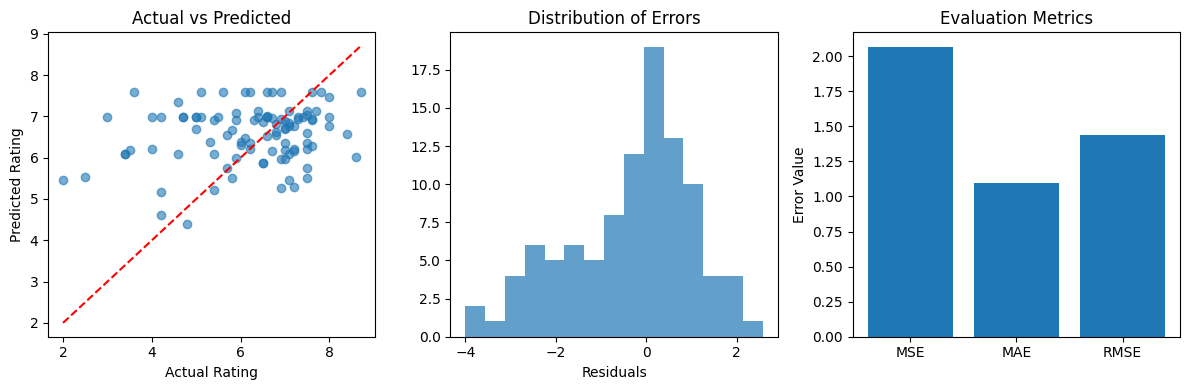

🎯 Model Performance: Accuracy 35.0%


In [59]:
# Run Evaluation
print("🔍 Evaluasi Model:")
mse, mae, rmse, accuracy, predictions, actuals = evaluate_model(dataset)

# Plot evaluasi
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(actuals, predictions, alpha=0.6)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs Predicted')

plt.subplot(1, 3, 2)
residuals = np.array(actuals) - np.array(predictions)
plt.hist(residuals, bins=15, alpha=0.7)
plt.xlabel('Residuals')
plt.title('Distribution of Errors')

plt.subplot(1, 3, 3)
plt.bar(['MSE', 'MAE', 'RMSE'], [mse, mae, rmse])
plt.title('Evaluation Metrics')
plt.ylabel('Error Value')

plt.tight_layout()
plt.show()

print(f"🎯 Model Performance: Accuracy {accuracy:.1f}%")

# Test Sistem

## Deskripsi:
Cell ini memiliki dua tujuan utama:

1. Membangun Fungsi Rekomendasi Interaktif: Mendefinisikan fungsi recommend_movie yang memungkinkan pengguna mendapatkan rekomendasi film dengan mudah hanya dengan memberikan judul film dan jumlah rekomendasi yang diinginkan. Fungsi ini juga menangani kasus di mana film tidak ditemukan.

2. Menguji Fungsi Interaktif & Memberikan Ringkasan Model: Menguji fungsi recommend_movie dengan contoh konkret dan kemudian menyajikan ringkasan singkat tentang sistem rekomendasi, termasuk ukuran dataset, metode yang digunakan, dan metrik evaluasi yang telah dihitung sebelumnya.

In [60]:
# Interactive Recommendation Function
def recommend_movie(title, n=5):
    try:
        recs = recommender.get_recommendations(title, n)
        print(f"📽️ Rekomendasi untuk '{title}':")
        for i, (_, row) in enumerate(recs.iterrows(), 1):
            print(f"{i}. {row['title']} - {row['genre']} - Rating: {row['users_rating']}")
    except:
        print("❌ Film tidak ditemukan")


In [61]:
# Test Interactive Function
# Contoh penggunaan
print("Contoh rekomendasi:")
recommend_movie(dataset['title'].iloc[10], 5)

# Summary
print("\n📊 RINGKASAN SISTEM REKOMENDASI")
print(f"• Dataset: {len(dataset)} film")
print(f"• Metode: Content-Based Filtering")
print(f"• Evaluasi: MSE={mse:.3f}, MAE={mae:.3f}, RMSE={rmse:.3f}")
print(f"• Akurasi: {accuracy:.1f}%")
print(f"• Status: ✅ Siap digunakan")

Contoh rekomendasi:
📽️ Rekomendasi untuk 'May the Devil Take You: Chapter Two':
1. Di Dasar Segalanya - Drama - Rating: 6.1
2. Danau Hitam - Horror - Rating: 6.1
3. Pocong 2 - Horror - Rating: 6.5
4. Si Juki - Animation - Rating: 6.4
5. Susi Susanti: Love All - Biography - Rating: 7.5

📊 RINGKASAN SISTEM REKOMENDASI
• Dataset: 1272 film
• Metode: Content-Based Filtering
• Evaluasi: MSE=2.067, MAE=1.094, RMSE=1.438
• Akurasi: 35.0%
• Status: ✅ Siap digunakan
